# Dataset Size Experiments

Explore how dataset size affects accuracy.

In [1]:
# Imports
from square_classifier import build_square_classifier
from train_square_classifier import get_training_generator, get_validation_generator
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
valid_generator = get_validation_generator(batch_size=32)
N_valid = len(valid_generator)

histories = []
accs = []
fracs = list(range(10, 101, 10))
for frac in fracs:
    model = build_square_classifier()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    
    train_generator = get_training_generator(frac, batch_size=32)
    N_train = len(train_generator)

    history = model.fit_generator(generator=train_generator,
                        steps_per_epoch=N_train,
                        epochs=10,
                        verbose=0,
                        validation_data=valid_generator,
                        validation_steps=N_valid)
    
    histories.append(history)
    accs.append(history.history["val_acc"][-1])
    del model


Only using first 851 of 8511 training examples
Only using first 1702 of 8511 training examples
Only using first 2553 of 8511 training examples
Only using first 3404 of 8511 training examples
Only using first 4256 of 8511 training examples
Only using first 5107 of 8511 training examples
Only using first 5958 of 8511 training examples
Only using first 6809 of 8511 training examples
Only using first 7660 of 8511 training examples
Only using first 8511 of 8511 training examples


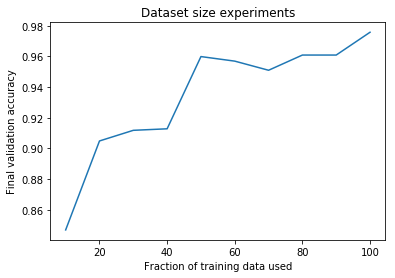

In [3]:
plt.figure()
plt.plot(fracs, accs)
plt.xlabel("Fraction of training data used")
plt.ylabel("Final validation accuracy")
plt.title("Dataset size experiments")
plt.show()
